In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro,kstest,normaltest
import statsmodels.api as sm
import scipy.stats as sts
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Problem Statement

In [ ]:
To predict the student's score based on their study hours.

### Data Gathering

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Data Science\Data Set\score.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df['Hours'].isna().sum()

0

In [6]:
df['Scores'].isna().sum()

0

In [ ]:
# no missing value
# datatype is int and float
# no need to encode

In [8]:
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [9]:
df['Hours'].value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [10]:
df['Scores'].value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

<AxesSubplot:xlabel='Hours'>

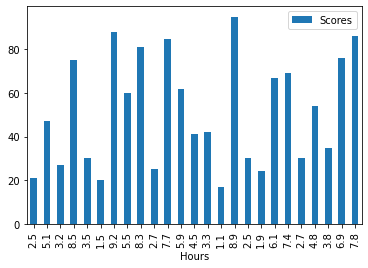

In [14]:
df.plot(x='Hours',y='Scores',kind='bar')

<AxesSubplot:ylabel='Frequency'>

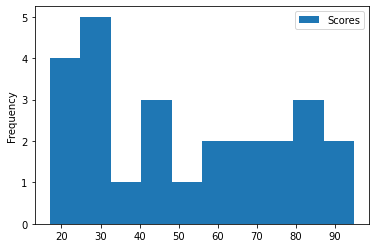

In [16]:
df.plot(x='Hours',y='Scores',kind='hist')

#### Check assumption - Linearity

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

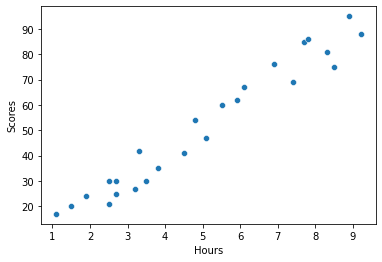

In [19]:
sns.scatterplot(df['Hours'],df['Scores'])

In [23]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Feature Engineering and feature selection

In [ ]:
As we have only one independant variable, no feature selection

### Model bulding/training

In [51]:
x = df[['Hours']].values
y = df['Scores'].values

#x = df.iloc[:,0].values
#y = df.iloc[:,1].values

In [46]:
#x = df.iloc[:, :-1].values  
#y = df.iloc[:, 1].values 

In [50]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [52]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 0)

In [54]:
x.shape

(25, 1)

In [55]:
x_train.shape

(20, 1)

In [56]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [57]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [58]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [60]:
linear.intercept_

2.018160041434683

In [61]:
linear.coef_

array([9.91065648])

#### plot BFL

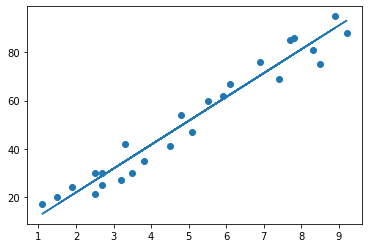

In [62]:
regression_line = (linear.coef_ * x) + linear.intercept_

plt.scatter(x,y)
plt.plot(x,regression_line)
plt.show()

### Model Evaluation

In [63]:
y_pred = linear.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [64]:
residual = y_test - y_pred
residual

array([ 3.11585524, -6.73226078, -6.357018  ,  3.20519876,  1.50896672])

#### check assumption Normality of residuals

<AxesSubplot:ylabel='Density'>

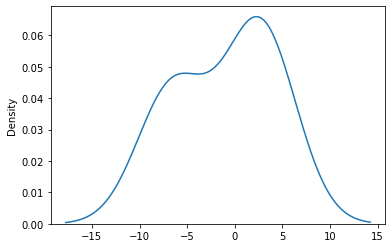

In [65]:
#1.kdeplot
sns.kdeplot(residual)

In [68]:
# 2.Hypothesis test
# a.shapiro test
_,p_value = shapiro(residual)
print("P value of Hypothesis Test:",p_value)
if p_value > 0.05:
    print("The residuals are normally distributed")
else:
    print("The residuals are not normally distributed")

P value of Hypothesis Test: 0.046544965356588364
The residuals are not normally distributed


In [ ]:
# b.normal test
_,p_value = normaltest(residual)
print("P value of Hypothesis Test:",p_value)
if p_value > 0.05:
    print("The residuals are normally distributed")
else:
    print("The residuals are not normally distributed")

In [70]:
_,p_val = kstest(residual,"norm")
print("P value of Hypothesis Test:",p_val)
if p_val >= 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

P value of Hypothesis Test: 0.07322527331730908
Data is normally distributed


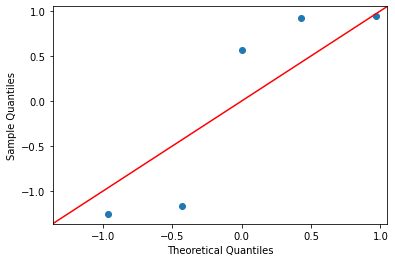

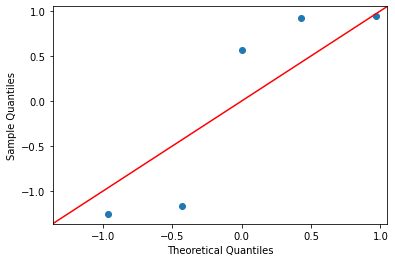

In [74]:
# 3. QQ plot
sm.qqplot(residual, line = '45',dist = sts.norm,fit = True)

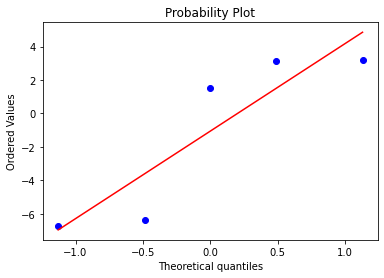

In [76]:
sts.probplot(residual,dist='norm',plot = plt)
plt.show()

#### Homoscedascity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

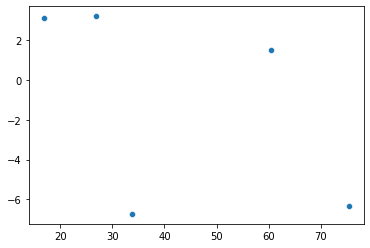

In [77]:
sns.scatterplot(y_pred,residual)

#### Evaluation on training data

In [82]:
y_pred_train = linear.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE         :",mse)

r2 = r2_score(y_train,y_pred_train)
print("R2 score    :",r2)

adj_r2 = 1-((1-r2) * (x_train.shape[0] -1)) / ((x_train.shape[0] -1) - x_train.shape[1] - 1)
print("Adj R2 value:",adj_r2)

MSE         : 30.89818237731452
R2 score    : 0.9515510725211552
Adj R2 value: 0.9458511987001147


#### evaluation on test data

In [83]:
y_pred_test = linear.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE         :",mse)

r2 = r2_score(y_test,y_pred_test)
print("R2 score    :",r2)

adj_r2 = 1-((1-r2) * (x_train.shape[0] -1)) / ((x_train.shape[0] -1) - x_train.shape[1] - 1)
print("Adj R2 value:",adj_r2)

MSE         : 21.5987693072174
R2 score    : 0.9454906892105356
Adj R2 value: 0.9390778291176574


#### Compare actual and predicted 'Score' values

In [85]:
df1 = pd.DataFrame({'Actual y': y_test,'Predicted y': y_pred, 'Residual': y_test - y_pred})
df1

,Actual y,Predicted y,Residual
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967
